<a href="https://colab.research.google.com/github/brsvis/NN/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22nndigitrecognition_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

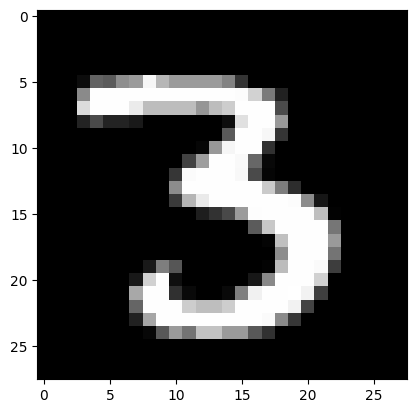

In [ ]:
n = 12
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[n])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train_org.shape)

(60000,)


Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation = "relu"))
model.add(Dense(400, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


Обучение нейронной сети

In [ ]:
model.fit(x_train, y_train, batch_size = 128, epochs = 15, verbose = 1)

Epoch 1/15
469/469 [==============================] - 7s 4ms/step - loss: 0.2037 - accuracy: 0.9394
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0757 - accuracy: 0.9770
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0194 - accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0104 - accuracy: 0.9969

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

 Распознавание рукописных цифр

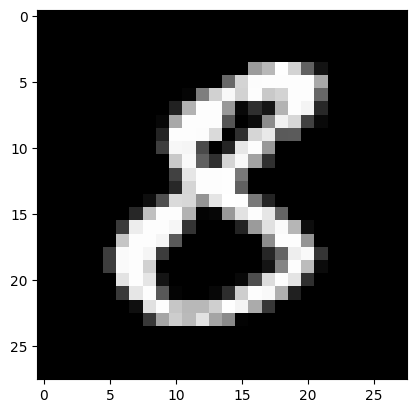

In [ ]:
n_rec = 1234
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
x = np.expand_dims(x, axis = 0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 128ms/step


In [ ]:
print(prediction)

[[3.0239967e-11 2.3274573e-08 2.8696618e-07 4.1086732e-05 3.1814218e-11
  1.5236852e-05 6.4096184e-08 1.7200508e-10 9.9994326e-01 1.0160386e-08]]


In [ ]:
prediction = np.argmax(prediction)
print(prediction)

8


In [ ]:
print(y_test_org[n_rec])

8
